In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import os

import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Set the stylesheets for plots
plt.style.use('ggplot')
plt.style.context('grayscale')

### Step 1: Load CSV files into Pandas dataframes

In [3]:
# Files to load
orders_to_load = os.path.join("..","Resources","orders.csv")
pizza_types_to_load = os.path.join("..","Resources","pizza_types.csv")
pizzas_to_load = os.path.join("..","Resources","pizzas.csv")
order_details_to_load = os.path.join("..","Resources","order_details.csv")

In [4]:
# Read the data into pandas dataframe
orders_df = pd.read_csv(orders_to_load)
pizza_types_df = pd.read_csv(pizza_types_to_load)
pizzas_df = pd.read_csv(pizzas_to_load)
order_details_df = pd.read_csv(order_details_to_load)

### Step 2: Inspect orders data

In [5]:
# dataframe info
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21350 entries, 0 to 21349
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   order_id  21350 non-null  int64 
 1   date      21350 non-null  object
 2   time      21350 non-null  object
dtypes: int64(1), object(2)
memory usage: 500.5+ KB


In [6]:
# Check for null values
orders_df.isnull().sum()

order_id    0
date        0
time        0
dtype: int64

In [7]:
# Check for duplicate values
orders_df.duplicated().value_counts()

False    21350
dtype: int64

In [8]:
# Datatypes
orders_df.dtypes

order_id     int64
date        object
time        object
dtype: object

#### Add required columns to a new orders dataframe

In [9]:
# Concatenate date and time to a single column
new_orders_df = orders_df.copy()
new_orders_df['date_time'] = new_orders_df['date'] + " " + new_orders_df["time"]
new_orders_df

,order_id,date,time,date_time
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40
2,3,2015-01-01,12:12:28,2015-01-01 12:12:28
3,4,2015-01-01,12:16:31,2015-01-01 12:16:31
4,5,2015-01-01,12:21:30,2015-01-01 12:21:30
...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12-31 20:51:07
21346,21347,2015-12-31,21:14:37,2015-12-31 21:14:37
21347,21348,2015-12-31,21:23:10,2015-12-31 21:23:10
21348,21349,2015-12-31,22:09:54,2015-12-31 22:09:54


In [10]:
# Convert the order time in string format to datetime format
new_orders_df['order_date_time'] = pd.to_datetime(new_orders_df['date_time'])

# Convert the date in string format to datetime format
new_orders_df['order_date'] = pd.to_datetime(new_orders_df['date'])

# Extract hour from datetime
new_orders_df['order_hour'] = new_orders_df['order_date_time'].dt.hour

# Extract day from datetime
new_orders_df['order_day'] = new_orders_df['order_date_time'].dt.day_name()

# Extract name of month from datetime
new_orders_df['order_month'] = new_orders_df['order_date_time'].dt.month_name()
new_orders_df

,order_id,date,time,date_time,order_date_time,order_date,order_hour,order_day,order_month
0,1,2015-01-01,11:38:36,2015-01-01 11:38:36,2015-01-01 11:38:36,2015-01-01,11,Thursday,January
1,2,2015-01-01,11:57:40,2015-01-01 11:57:40,2015-01-01 11:57:40,2015-01-01,11,Thursday,January
2,3,2015-01-01,12:12:28,2015-01-01 12:12:28,2015-01-01 12:12:28,2015-01-01,12,Thursday,January
3,4,2015-01-01,12:16:31,2015-01-01 12:16:31,2015-01-01 12:16:31,2015-01-01,12,Thursday,January
4,5,2015-01-01,12:21:30,2015-01-01 12:21:30,2015-01-01 12:21:30,2015-01-01,12,Thursday,January
...,...,...,...,...,...,...,...,...,...
21345,21346,2015-12-31,20:51:07,2015-12-31 20:51:07,2015-12-31 20:51:07,2015-12-31,20,Thursday,December
21346,21347,2015-12-31,21:14:37,2015-12-31 21:14:37,2015-12-31 21:14:37,2015-12-31,21,Thursday,December
21347,21348,2015-12-31,21:23:10,2015-12-31 21:23:10,2015-12-31 21:23:10,2015-12-31,21,Thursday,December
21348,21349,2015-12-31,22:09:54,2015-12-31 22:09:54,2015-12-31 22:09:54,2015-12-31,22,Thursday,December


In [11]:
new_orders_df = new_orders_df.drop(['date','time','date_time'], axis=1)
new_orders_df

,order_id,order_date_time,order_date,order_hour,order_day,order_month
0,1,2015-01-01 11:38:36,2015-01-01,11,Thursday,January
1,2,2015-01-01 11:57:40,2015-01-01,11,Thursday,January
2,3,2015-01-01 12:12:28,2015-01-01,12,Thursday,January
3,4,2015-01-01 12:16:31,2015-01-01,12,Thursday,January
4,5,2015-01-01 12:21:30,2015-01-01,12,Thursday,January
...,...,...,...,...,...,...
21345,21346,2015-12-31 20:51:07,2015-12-31,20,Thursday,December
21346,21347,2015-12-31 21:14:37,2015-12-31,21,Thursday,December
21347,21348,2015-12-31 21:23:10,2015-12-31,21,Thursday,December
21348,21349,2015-12-31 22:09:54,2015-12-31,22,Thursday,December


#### Order Summary

In [12]:
# Get the total number of order days.
len(new_orders_df["order_date"].unique())

358

In [13]:
# Get the total number orders placed in the store.
new_orders_df["order_id"].count()

21350

In [14]:
# The number of orders per day (rounded to nearest integer)
print(f'Typical number of orders per day: {round(new_orders_df["order_id"].count()/len(new_orders_df["order_date"].unique()))}')

Typical number of orders per day: 60


In [15]:
# Peak hours in the store
peak_hours = new_orders_df.groupby(['order_hour']).count()["order_id"]
peak_hours.sort_values(ascending=False).head(5)

order_hour
12    2520
13    2455
18    2399
17    2336
19    2009
Name: order_id, dtype: int64

Text(0.5, 1.0, 'Orders by Hour')

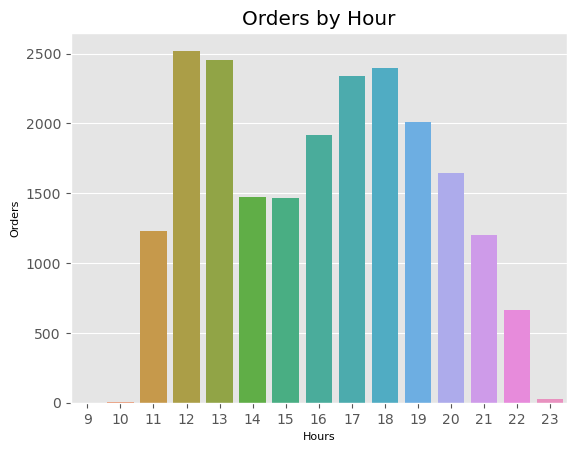

In [16]:
# Plot the peak hours in a day
sns.countplot(data = new_orders_df.sort_values("order_hour",ascending=True), x="order_hour")
plt.xlabel("Hours",fontsize=8,color="black")
plt.ylabel("Orders",fontsize= 8, color="black")
plt.title("Orders by Hour")

- **Noon and evening hours are the peak hours in this pizza store.**

In [17]:
# Busiest day of the week
new_orders_df["order_day"].value_counts().sort_index()

Friday       3538
Monday       2794
Saturday     3158
Sunday       2624
Thursday     3239
Tuesday      2973
Wednesday    3024
Name: order_day, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Friday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Monday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

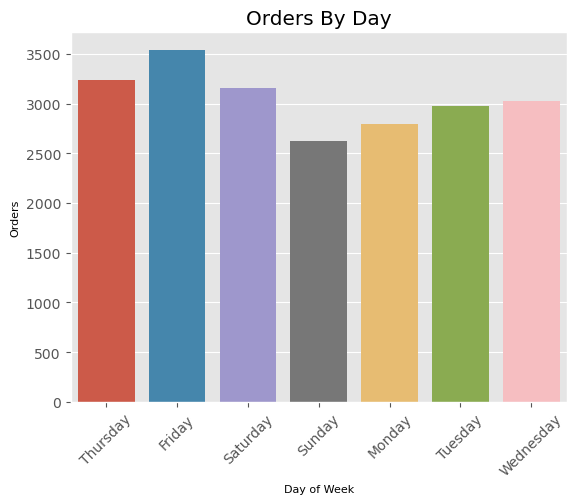

In [18]:
# Plot the busiest days in a week
sns.countplot(data=new_orders_df,x="order_day")
plt.xlabel("Day of Week",fontsize=8,color="black")
plt.ylabel("Orders",fontsize=8,color="black")
plt.title("Orders By Day")
plt.xticks(rotation=45)

- **Friday is the busiest day of the week followed by Thursday.**

In [19]:
# Orders per month
new_orders_df["order_month"].value_counts().sort_values()

October      1646
September    1661
December     1680
February     1685
June         1773
November     1792
April        1799
March        1840
August       1841
January      1845
May          1853
July         1935
Name: order_month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

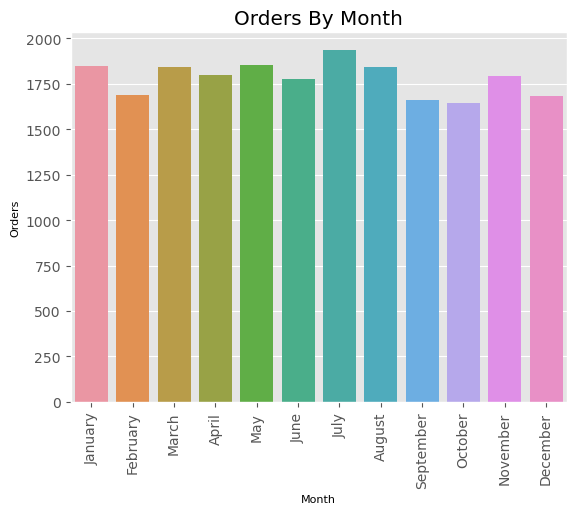

In [20]:
# Plot the busiest months in a year
sns.countplot(data=new_orders_df,x="order_month")
plt.xlabel("Month",fontsize=8,color="black")
plt.ylabel("Orders",fontsize=8,color="black")
plt.title("Orders By Month")
plt.xticks(rotation=90)

- **July and May have the most orders in the year while October and September have least orders.**

### Step 3: Inspect pizza types data

In [21]:
pizza_types_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pizza_type_id  32 non-null     object
 1   name           32 non-null     object
 2   category       32 non-null     object
 3   ingredients    32 non-null     object
dtypes: object(4)
memory usage: 1.1+ KB


In [22]:
# Check for null values
pizza_types_df.isnull().sum()

pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64

In [23]:
# Check for duplicate values
pizza_types_df.duplicated().sum()

0

In [24]:
pizza_types_df.sample(5)

,pizza_type_id,name,category,ingredients
11,pep_msh_pep,"The Pepperoni, Mushroom, and Peppers Pizza",Classic,"Pepperoni, Mushrooms, Green Peppers"
14,brie_carre,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
15,calabrese,The Calabrese Pizza,Supreme,"ëNduja Salami, Pancetta, Tomatoes, Red Onions,..."
24,four_cheese,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo..."
23,five_cheese,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."


#### Pizza Types Summary

In [25]:
# Categories of pizzas available
pizza_types_df['category'].unique()

array(['Chicken', 'Classic', 'Supreme', 'Veggie'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fdd60ab1d90>,
 [Text(0.6978326125800102, 0.8503114986990107, 'Supreme'),
  Text(-0.9701133907831905, 0.5185364105085977, 'Veggie'),
  Text(-0.4209517756015994, -1.0162674857624152, 'Classic'),
  Text(0.9146165735327998, -0.6111272563215624, 'Chicken')],
 [Text(0.38063597049818737, 0.46380627201764213, '28.1%'),
  Text(-0.5291527586090129, 0.28283804209559865, '28.1%'),
  Text(-0.22961005941905419, -0.5543277195067718, '25.0%'),
  Text(0.4988817673815271, -0.3333421398117613, '18.8%')])

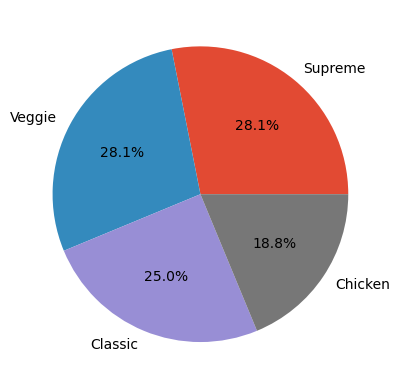

In [26]:
# Pie chart with pizza categories
labels = pizza_types_df["category"].value_counts().index
sizes = pizza_types_df["category"].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')

- **Veggie and Supreme categories have more pizza types compared to Classic and Chicken.**

### Step 4: Inspect pizzas data

In [27]:
# Dataframe info
pizzas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pizza_id       96 non-null     object 
 1   pizza_type_id  96 non-null     object 
 2   size           96 non-null     object 
 3   price          96 non-null     float64
dtypes: float64(1), object(3)
memory usage: 3.1+ KB


In [28]:
# Check for null values
pizzas_df.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

In [29]:
# Check for duplicate values
pizzas_df.duplicated().sum()

0

In [30]:
# Display last few rows of dataframe 
pizzas_df.tail(5)

,pizza_id,pizza_type_id,size,price
91,spinach_fet_m,spinach_fet,M,16.00
92,spinach_fet_l,spinach_fet,L,20.25
93,veggie_veg_s,veggie_veg,S,12.00
94,veggie_veg_m,veggie_veg,M,16.00
95,veggie_veg_l,veggie_veg,L,20.25


#### Pizzas data summary

In [31]:
# Get pizza price statistics
pizzas_df.describe()

,price
count,96.000000
mean,16.440625
std,4.090266
min,9.750000
25%,12.500000
50%,16.250000
75%,20.250000
max,35.950000


In [32]:
# The most expensive pizza offered
max_price = pizzas_df['price'].max()
expensive_pizza = pizzas_df['price'] == max_price
pizzas_df[expensive_pizza]

,pizza_id,pizza_type_id,size,price
43,the_greek_xxl,the_greek,XXL,35.95


In [33]:
# Least expensive pizza
least_price = pizzas_df['price'].min()
least_expensive_pizza = pizzas_df['price'] == least_price
pizzas_df[least_expensive_pizza]

,pizza_id,pizza_type_id,size,price
36,pepperoni_s,pepperoni,S,9.75


In [34]:
# Pizza sizes offered
pizzas_df['size'].unique()

array(['S', 'M', 'L', 'XL', 'XXL'], dtype=object)

([<matplotlib.patches.Wedge at 0x7fdd60c1dd10>,
 [Text(0.5499999702695115, 0.9526279613277875, 'S'),
  Text(-1.0994110473472416, 0.03599095679252379, 'M'),
  Text(0.45397770151505074, -1.0019502215814475, 'L'),
  Text(1.0947031927147481, -0.10781892162388282, 'XL'),
  Text(1.0994110440828242, -0.03599105651011783, 'XXL')],
 [Text(0.2999999837833699, 0.5196152516333385, '33.3%'),
  Text(-0.5996787530984954, 0.019631430977740245, '32.3%'),
  Text(0.24762420082639128, -0.5465183026807895, '32.3%'),
  Text(0.5971108323898626, -0.05881032088575426, '1.0%'),
  Text(0.599678751317904, -0.019631485369155176, '1.0%')])

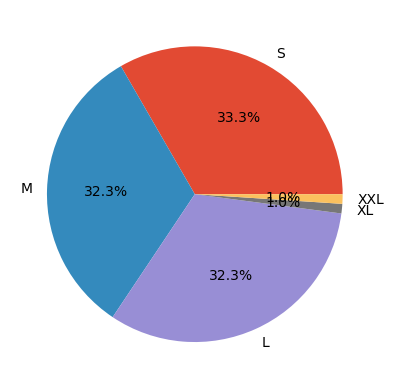

In [35]:
# Pie chart with pizza sizes
labels = pizzas_df["size"].value_counts().index
sizes = pizzas_df["size"].value_counts()
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%')

- **The store offers more Small size pizzas compared to other sizes.**

In [36]:
# The number of unique pizzas offered in the store
pizzas_df['pizza_type_id'].nunique()

32

### Step 5: Inspect order_details data

In [37]:
order_details_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   order_details_id  48620 non-null  int64 
 1   order_id          48620 non-null  int64 
 2   pizza_id          48620 non-null  object
 3   quantity          48620 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [38]:
# Check for null values
order_details_df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

In [39]:
# Check for duplicates
order_details_df.duplicated().value_counts()

False    48620
dtype: int64

In [40]:
order_details_df.sample(5)

,order_details_id,order_id,pizza_id,quantity
23467,23468,10316,big_meat_s,1
29503,29504,13035,four_cheese_l,1
10795,10796,4729,classic_dlx_s,1
40564,40565,17871,thai_ckn_l,1
6033,6034,2675,pep_msh_pep_m,1


In [41]:
# Total pizzas sold in the store
order_details_df['quantity'].sum()

49574

### Step 6: Join the data frames

In [42]:
sales_order_df = (new_orders_df
                  .merge(order_details_df, how='inner', on=['order_id'])
                  .merge(pizzas_df, how='inner', on=['pizza_id'])
                  .merge(pizza_types_df, how='inner', on=['pizza_type_id'])
                 )

sales_order_df.sample(5)

,order_id,order_date_time,order_date,order_hour,order_day,order_month,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
44996,17814,2015-10-31 13:08:25,2015-10-31,13,Saturday,October,40445,sicilian_m,1,sicilian,M,16.25,The Sicilian Pizza,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives..."
42229,12494,2015-07-28 12:10:56,2015-07-28,12,Tuesday,July,28360,peppr_salami_l,1,peppr_salami,L,20.75,The Pepper Salami Pizza,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ..."
29687,2958,2015-02-19 12:56:06,2015-02-19,12,Thursday,February,6704,pepperoni_m,1,pepperoni,M,12.50,The Pepperoni Pizza,Classic,"Mozzarella Cheese, Pepperoni"
46640,3692,2015-03-04 11:31:04,2015-03-04,11,Wednesday,March,8423,ckn_alfredo_l,1,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
42326,16077,2015-09-28 15:04:54,2015-09-28,15,Monday,September,36409,peppr_salami_l,1,peppr_salami,L,20.75,The Pepper Salami Pizza,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ..."


#### Inspect the merged dataframe

In [43]:
sales_order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          48620 non-null  int64         
 1   order_date_time   48620 non-null  datetime64[ns]
 2   order_date        48620 non-null  datetime64[ns]
 3   order_hour        48620 non-null  int64         
 4   order_day         48620 non-null  object        
 5   order_month       48620 non-null  object        
 6   order_details_id  48620 non-null  int64         
 7   pizza_id          48620 non-null  object        
 8   quantity          48620 non-null  int64         
 9   pizza_type_id     48620 non-null  object        
 10  size              48620 non-null  object        
 11  price             48620 non-null  float64       
 12  name              48620 non-null  object        
 13  category          48620 non-null  object        
 14  ingredients       4862

In [44]:
sales_order_df.isna().sum()

order_id            0
order_date_time     0
order_date          0
order_hour          0
order_day           0
order_month         0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

In [45]:
sales_order_df.duplicated().sum()

0

In [46]:
sales_order_df[['quantity','price']].describe().T.style.background_gradient(cmap="Blues")

,count,mean,std,min,25%,50%,75%,max
quantity,48620.000000,1.019622,0.143077,1.000000,1.000000,1.000000,1.000000,4.000000
price,48620.000000,16.494132,3.621789,9.750000,12.750000,16.500000,20.250000,35.950000


In [47]:
# Save merged data in a csv file
sales_order_df.to_csv("../Resources/pizza_place_sales.csv")

### Step 7: Explore and Visualize data
- How many customers do we have each day? Are there any peak hours?
- How many pizzas are typically in an order? Do we have any bestsellers?
- How much money did we make this year? Can we identify any seasonality in the sales?
- Are there any pizzas we should take of the menu, or any promotions we could leverage?

### Peak Hours Summary

In [48]:
# Create a spread sheet type pivot table as a dataframe
peak_hours_df = sales_order_df.pivot_table(values=["order_id","quantity"],
                                           index=["order_hour"],
                                           aggfunc={"order_id":pd.Series.nunique,"quantity":'sum'}
                                          )
# Rename the columns
peak_hours_df.columns = ["Total Orders","Total Quantity"]

# Display the pivot table
peak_hours_df.sort_values(by=["Total Orders","Total Quantity"], 
                          ascending=False).style.background_gradient(
    subset=pd.IndexSlice[:,["Total Orders","Total Quantity"]],cmap="Blues")

,Total Orders,Total Quantity
order_hour,,
12,2520,6776
13,2455,6413
18,2399,5417
17,2336,5211
19,2009,4406
16,1920,4239
20,1642,3534
14,1472,3613
15,1468,3216


### Busy Days in a week 

In [49]:
busy_hours_df = sales_order_df.pivot_table(values=["order_id","quantity"],
                                           index=["order_day"],
                                           aggfunc={"order_id":pd.Series.nunique,"quantity":'sum'}
                                          )
# Rename the columns
busy_hours_df.columns = ["Total Orders","Total Quantity"]

# Display table
busy_hours_df.sort_values(by=["Total Orders","Total Quantity"], 
                          ascending=False).style.background_gradient(
    subset=pd.IndexSlice[:,["Total Orders","Total Quantity"]],cmap="Blues")

,Total Orders,Total Quantity
order_day,,
Friday,3538,8242
Thursday,3239,7478
Saturday,3158,7493
Wednesday,3024,6946
Tuesday,2973,6895
Monday,2794,6485
Sunday,2624,6035


### Busy months in the year

In [50]:
busy_months_df = sales_order_df.pivot_table(values=["order_id","quantity"],
                                            index=["order_month"],
                                            aggfunc={"order_id":pd.Series.nunique,"quantity":'sum'}
                                           )

# Rename columns
busy_months_df.columns = ["Total Orders","Total Quantity"]

# Display Month summary
busy_months_df.sort_values(by=["Total Orders","Total Quantity"], 
                          ascending=False).style.background_gradient(
    subset=pd.IndexSlice[:,["Total Orders","Total Quantity"]],cmap="Blues")

,Total Orders,Total Quantity
order_month,,
July,1935,4392
May,1853,4328
January,1845,4232
August,1841,4168
March,1840,4261
April,1799,4151
November,1792,4266
June,1773,4107
February,1685,3961


### Pizza bestsellers

In [51]:
# Best sold pizza
pizza_bestsellers_df = sales_order_df.pivot_table(values=['order_id','quantity'],
                                                 index=['name'],
                                                 aggfunc={"order_id":pd.Series.nunique,"quantity":'sum'}
                                                 )
# Rename columns
pizza_bestsellers_df.columns = ["Total Orders","Total Quantity"]

# Sort and Display table
pizza_bestsellers_df.sort_values(by=["Total Orders","Total Quantity"], 
                          ascending=False).style.background_gradient(
    subset=pd.IndexSlice[:,["Total Orders","Total Quantity"]],cmap="Blues")

,Total Orders,Total Quantity
name,,
The Classic Deluxe Pizza,2329,2453
The Hawaiian Pizza,2280,2422
The Pepperoni Pizza,2278,2418
The Barbecue Chicken Pizza,2273,2432
The Thai Chicken Pizza,2225,2371
The California Chicken Pizza,2197,2370
The Southwest Chicken Pizza,1825,1917
The Spicy Italian Pizza,1822,1924
The Sicilian Pizza,1820,1938


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'The Hawaiian Pizza'),
  Text(1, 0, 'The Classic Deluxe Pizza'),
  Text(2, 0, 'The Five Cheese Pizza'),
  Text(3, 0, 'The Italian Supreme Pizza'),
  Text(4, 0, 'The Mexicana Pizza'),
  Text(5, 0, 'The Thai Chicken Pizza'),
  Text(6, 0, 'The Prosciutto and Arugula Pizza'),
  Text(7, 0, 'The Barbecue Chicken Pizza'),
  Text(8, 0, 'The Greek Pizza'),
  Text(9, 0, 'The Spinach Supreme Pizza'),
  Text(10, 0, 'The Green Garden Pizza'),
  Text(11, 0, 'The Italian Capocollo Pizza'),
  Text(12, 0, 'The Spicy Italian Pizza'),
  Text(13, 0, 'The Spinach Pesto Pizza'),
  Text(14, 0, 'The Vegetables + Vegetables Pizza'),
  Text(15, 0, 'The Southwest Chicken Pizza'),
  Text(16, 0, 'The California Chicken Pizza'),
  Text(17, 0, 'The Pepperoni Pizza'),
  Text(18, 0, 'The Chicken Pesto Pizza'),
  Text(19, 0, 'The Big Meat Pizza'),
  Text(20, 0, '

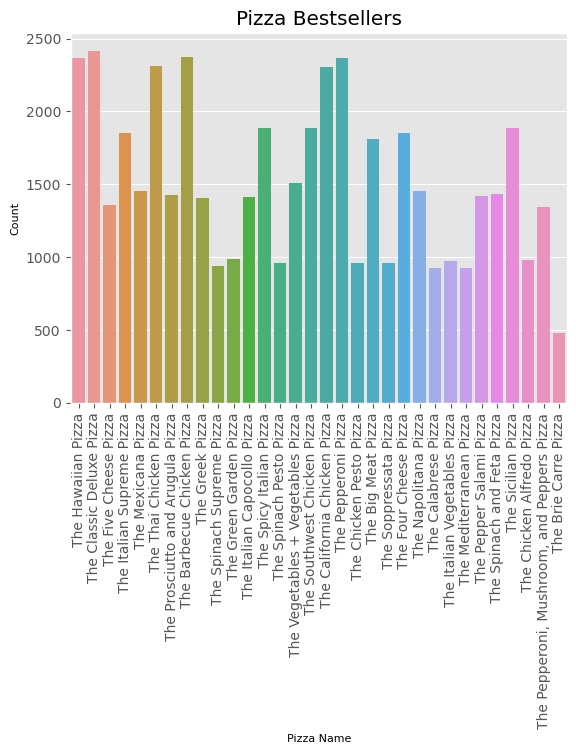

In [52]:
sns.countplot(data=sales_order_df,x="name")
plt.xlabel("Pizza Name",fontsize=8,color="black")
plt.ylabel("Count",fontsize=8,color="black")
plt.title("Pizza Bestsellers")
plt.xticks(rotation=90)

In [53]:
# Best sold pizza category
category_bestsellers_df = sales_order_df.groupby('category')['quantity'].sum().sort_values(ascending=False)
print(category_bestsellers_df)

category
Classic    14888
Supreme    11987
Veggie     11649
Chicken    11050
Name: quantity, dtype: int64


<AxesSubplot:ylabel='quantity'>

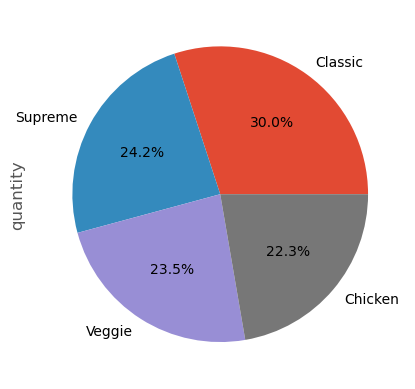

In [78]:
category_bestsellers_df.plot.pie(y='quantity',autopct='%1.1f%%')

### Sales Summary

In [54]:
print(f'Annual Sales: ${round(sum(sales_order_df["quantity"] * sales_order_df["price"]),2)}')

Annual Sales: $817860.05


In [55]:
print(f'Average order value: ${round(sum(sales_order_df["quantity"] * sales_order_df["price"])/len(orders_df),2)}')

Average order value: $38.31


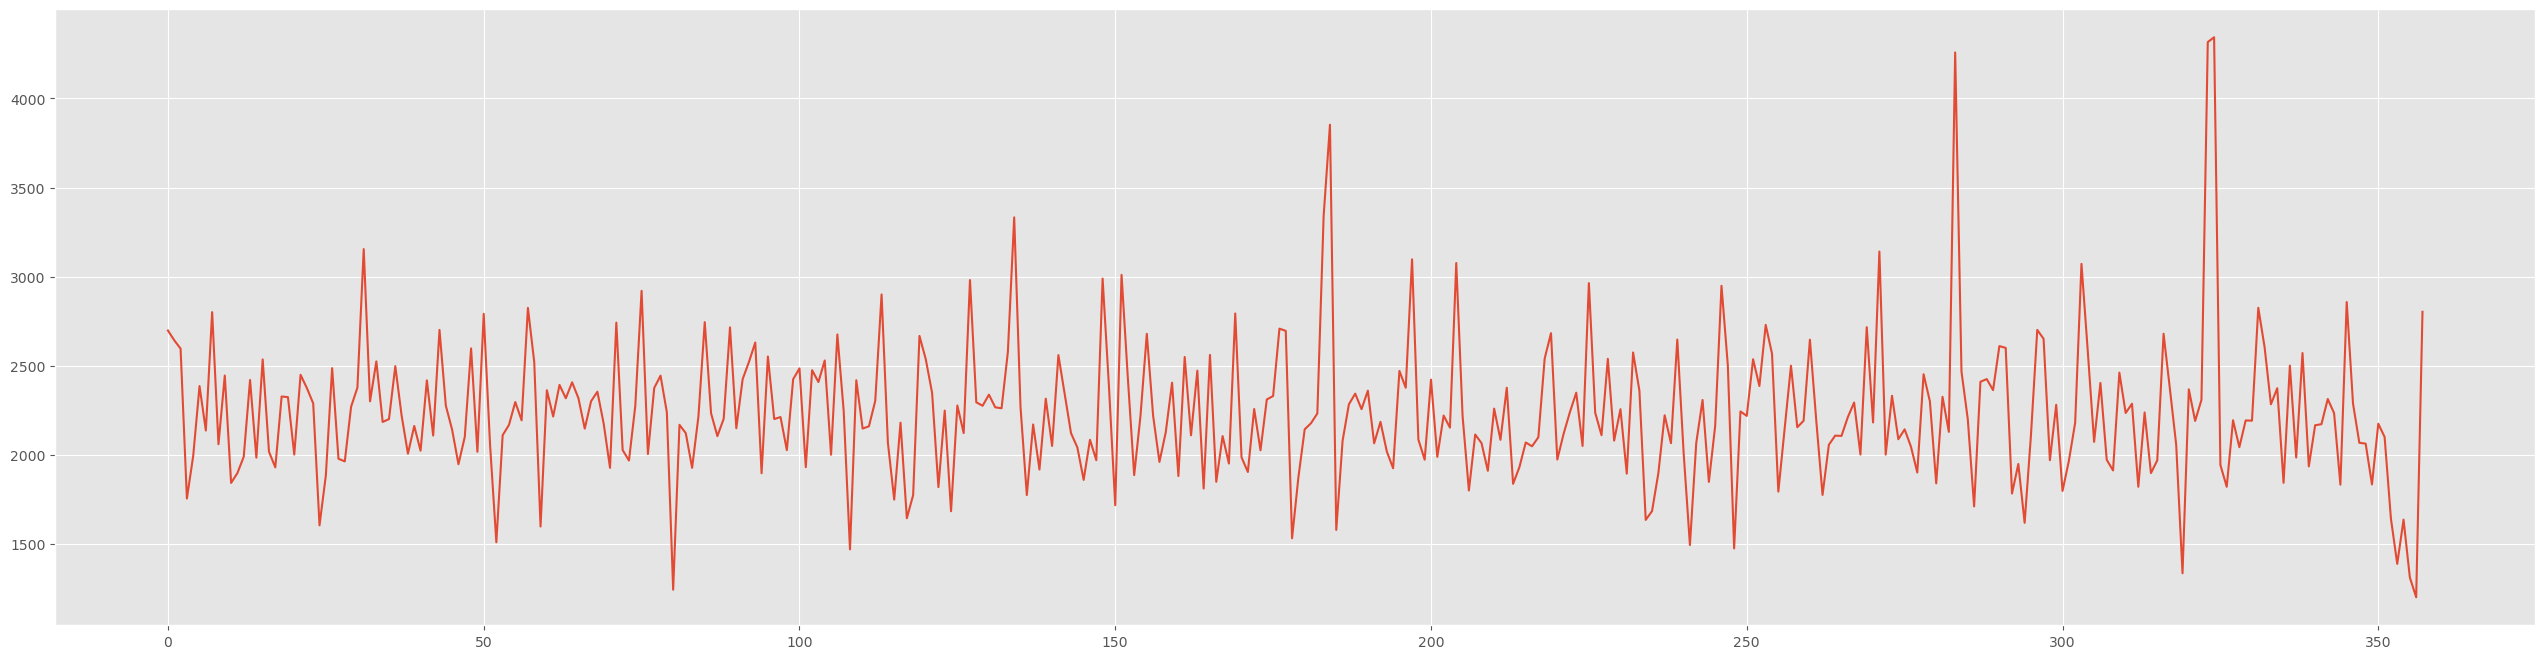

In [56]:
# Plot the sales per date in the year
order_groups_by_day_df = sales_order_df.groupby('order_date')['price'].sum().reset_index()
plt.figure(figsize=(32, 8))
plt.plot(order_groups_by_day_df['price'])


In [ ]:
# Which pizza size earned more revenue?

In [ ]:
# Which pizza category earned more revenue?

In [ ]:
# Revenue generated group by pizza name